In [76]:
import numpy as np
import pandas as pd

import os

import matplotlib.pyplot as plt
import seaborn as sns


In [50]:
pd.set_option('display.max_columns', 40)

Pandas cannot handel 6G data while simply reading it.
There are four solutions I can think of:
1. reading only a few columns and analyze at once. However, calculation such as correlation might be a problem in the future even I successfully read in the data.
2. specify each dtype since default dtype takes more memories. However it might have future problem asa point 1.
3. load data in as matrix
4. use spark

Of all the solutioins above, I will try second method first just to test if I can load in the data this way and I am just so familiar analyzing data using pandas, can't give it up so quick without giving it a shot.
However, I think it makes more sense to use spark for following reasons:
1. It can ba a lot faster when doing calculation.
2. The dataset I have only cover 7 days of behavoior data, In the real world setting, I think this type of data is the classic "big data" people are talking all the time. And spark is designed for handling this type of data! 
3. Because the reason in bullet point 2, even I am not dealing with sreaming data, It is better to showcase I have this skillset to the employers.

# Load Data

In [58]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
spark = SparkSession \
    .builder \
    .appName("EDA") \
    .getOrCreate()

In [3]:
spark.sparkContext.getConf().getAll()

[('spark.app.id', 'local-1599752070214'),
 ('spark.driver.port', '38623'),
 ('spark.rdd.compress', 'True'),
 ('spark.serializer.objectStreamReset', '100'),
 ('spark.master', 'local[*]'),
 ('spark.submit.pyFiles', ''),
 ('spark.executor.id', 'driver'),
 ('spark.app.name', 'EDA'),
 ('spark.submit.deployMode', 'client'),
 ('spark.ui.showConsoleProgress', 'true'),
 ('spark.driver.host', '192.168.2.162')]

In [4]:
data_dir = "../MLE_Project_Data"
data_file_name = "train_data.csv"
data_path = os.path.join(data_dir,data_file_name)

raw_df = spark.read.load(data_path,format="csv",delimiter="|",header=True)

# Examine Data

In [41]:
raw_df_shape = (raw_df.count(),len(raw_df.columns))
print(f"The shape: {raw_df_shape}")

The shape: (41907133, 36)


In [51]:
# head
raw_df_head = [row.asDict() for row in raw_df.head(5)]
pd.DataFrame(raw_df_head)

,label,uid,task_id,adv_id,creat_type_cd,adv_prim_id,dev_id,inter_type_cd,slot_id,spread_app_id,tags,app_first_class,app_second_class,age,city,city_rank,device_name,device_size,career,gender,net_type,residence,his_app_size,his_on_shelf_time,app_score,emui_dev,list_time,device_price,up_life_duration,up_membership_grade,membership_life_duration,consume_purchase,communication_onlinerate,communication_avgonline_30d,indu_name,pt_d
0,0,1638254,2112,6869,7,207,17,5,11,13,37,4,21,5,437,5,37,162,4,2,2,28,4,2,2,20,4,4,20,-1,-1,2,0^1^2^3^4^5^6^7^8^9^10^11^12^13^14^15^16^17^18...,12,17,1
1,0,1161786,3104,3247,7,183,29,5,17,86,37,4,21,4,370,5,59,141,9,4,2,26,4,3,2,20,4,4,18,-1,-1,2,3^4^5^6^7^8^9^10^11^12^13^14^15^16^17^18^19^20...,12,17,1
2,0,1814783,5890,4183,7,178,17,5,11,70,39,4,17,5,306,3,81,162,4,2,2,21,2,3,2,20,4,5,20,-1,-1,2,0^1^2^3^4^5^6^7^8^9^10^11^12^13^14^15^16^17^18...,11,36,1
3,0,1468996,1993,5405,7,207,17,5,21,13,37,4,21,5,275,5,88,180,4,2,2,23,4,2,2,20,7,3,-1,-1,-1,2,5^6^7^8^9^10^11^12^13^14^15^16^17^18^19^20^21^...,11,17,1
4,0,2164010,5439,4677,2,138,24,5,12,33,15,4,15,5,412,3,88,180,4,2,2,20,16,3,2,20,7,3,-1,-1,-1,2,2^3^4^5^6^7^8^9^10^11^12^13^14^15^16^17^18^19^...,11,20,1


In [52]:
# tail
raw_df_tail = [row.asDict() for row in raw_df.tail(5)]
pd.DataFrame(raw_df_tail)

,label,uid,task_id,adv_id,creat_type_cd,adv_prim_id,dev_id,inter_type_cd,slot_id,spread_app_id,tags,app_first_class,app_second_class,age,city,city_rank,device_name,device_size,career,gender,net_type,residence,his_app_size,his_on_shelf_time,app_score,emui_dev,list_time,device_price,up_life_duration,up_membership_grade,membership_life_duration,consume_purchase,communication_onlinerate,communication_avgonline_30d,indu_name,pt_d
0,0,2154906,5275,5473,7,156,56,5,13,58,37,4,21,6,255,3,87,117,9,2,2,18,14,3,2,28,5,4,18,-1,-1,2,1^2^3^4^5^6^7^8^9^10^11^12^13^14^15^16^17^18^1...,13,17,7
1,0,1466996,5952,4158,7,207,17,5,17,13,37,4,21,5,335,3,75,141,4,4,2,38,4,3,2,20,8,5,18,-1,-1,2,0^1^2^3^4^5^6^7^8^9^10^11^12^13^14^15^16^17^18...,12,17,7
2,0,1930657,2178,1860,2,142,60,5,12,80,41,2,26,5,140,4,29,141,10,2,3,30,-1,-1,1,20,9,3,-1,-1,-1,2,6^7^8^9^10^11^12^13^14^15^16^17^18^19^20^21^22^23,11,24,7
3,0,1550398,1976,6739,7,154,56,5,11,31,40,4,25,5,275,5,38,162,3,2,2,23,13,3,2,20,4,4,20,1,-1,2,3^4^5^6^7^8^9^10^11^12^13^14^15^16^17^18^19^20...,11,17,7
4,0,1400807,3869,6751,7,130,30,5,13,28,39,4,17,4,406,5,65,141,4,2,2,21,6,2,2,14,10,2,20,-1,-1,2,7^8^9^10^11^12^13^14^15^16^17^18^19^20^21^22^23,10,36,7


In [48]:
# dtypes
raw_df.schema.fields

[StructField(label,StringType,true),
 StructField(uid,StringType,true),
 StructField(task_id,StringType,true),
 StructField(adv_id,StringType,true),
 StructField(creat_type_cd,StringType,true),
 StructField(adv_prim_id,StringType,true),
 StructField(dev_id,StringType,true),
 StructField(inter_type_cd,StringType,true),
 StructField(slot_id,StringType,true),
 StructField(spread_app_id,StringType,true),
 StructField(tags,StringType,true),
 StructField(app_first_class,StringType,true),
 StructField(app_second_class,StringType,true),
 StructField(age,StringType,true),
 StructField(city,StringType,true),
 StructField(city_rank,StringType,true),
 StructField(device_name,StringType,true),
 StructField(device_size,StringType,true),
 StructField(career,StringType,true),
 StructField(gender,StringType,true),
 StructField(net_type,StringType,true),
 StructField(residence,StringType,true),
 StructField(his_app_size,StringType,true),
 StructField(his_on_shelf_time,StringType,true),
 StructField(app_

In [53]:
raw_df.columns

['label',
 'uid',
 'task_id',
 'adv_id',
 'creat_type_cd',
 'adv_prim_id',
 'dev_id',
 'inter_type_cd',
 'slot_id',
 'spread_app_id',
 'tags',
 'app_first_class',
 'app_second_class',
 'age',
 'city',
 'city_rank',
 'device_name',
 'device_size',
 'career',
 'gender',
 'net_type',
 'residence',
 'his_app_size',
 'his_on_shelf_time',
 'app_score',
 'emui_dev',
 'list_time',
 'device_price',
 'up_life_duration',
 'up_membership_grade',
 'membership_life_duration',
 'consume_purchase',
 'communication_onlinerate',
 'communication_avgonline_30d',
 'indu_name',
 'pt_d']

In [61]:
# describe
describe = raw_df.describe()
describe.toPandas().set_index("summary").T

summary,count,mean,stddev,min,max
label,41907133,0.034492648304048856,0.18249083898022259,0,1
uid,41907133,1618366.5450654665,357389.65521592135,1000001,2237673
task_id,41907133,3436.3739258660335,1429.9486235761321,1001,5992
adv_id,41907133,3963.51341013951,1720.5691813375768,1001,7020
creat_type_cd,41907133,6.490081748135813,1.231181612514361,2,9
adv_prim_id,41907133,159.31912006483478,30.899225966287723,101,214
dev_id,41907133,41.59357343772479,17.41486835377897,11,72
inter_type_cd,41907133,4.646959504483402,0.7103276382288628,2,5
slot_id,41907133,15.254736109005595,3.167097985067854,11,22
spread_app_id,41907133,51.9989373646725,25.10112386162042,11,89


Most of the columns are acutallly categorical variables, doesn't make sense to lokking at those statistics.
However, this summary is a way to confirm whether those categorical columns are really categorical

In [56]:
numeric_columns = ["age","device_size",'his_app_size','app_score','device_price']

In [57]:
# describe
describe = raw_df.select(numeric_columns) \
    .describe()
describe.toPandas().set_index("summary").T

summary,count,mean,stddev,min,max
age,41907133,5.055212772489113,1.4153192617965202,-1,7
device_size,41907133,158.2104430527376,45.07228338655767,101,349
his_app_size,41907133,6.5524609378551375,5.898097528503572,-1,9
app_score,41907133,1.7847627037621494,0.41098686910490795,1,2
device_price,41907133,3.476986387973618,1.1587958240779863,-1,7


Seems like even these are numerical variables but they are already benn grouped by a different bucket levels.
Because there is no further explanation, I need to make a few assumptions:
1. value = -1 equal missing value
2. value of app_score is actual score
3. device price 1-7 means cheap to expensive
4. age 1-7 means young to old

This discovery means when processing data for models, I need to create a lot dummy variables.

# Explore Data

## label distribution

In [71]:
label_count = raw_df.select("label").groupby("label").count().toPandas()

In [87]:
label_count["pct"] = np.round(label_count["count"].values/raw_df_shape[0],decimals=2)
label_count

,label,count,pct
0,0,40461645,0.97
1,1,1445488,0.03


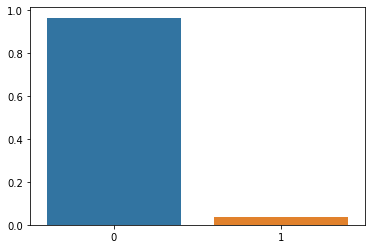

In [83]:
plot = sns.barplot(label_count["label"].values,label_count["count"].values/raw_df_shape[0])

The label distribution is imbalance. But it is expected. This means CTR in this dataset is around 3.5% which is better than the average CTR number I googled.
<img src="images/avg_ctr.png">

## ID columns

In [90]:
raw_df.columns

['label',
 'uid',
 'task_id',
 'adv_id',
 'creat_type_cd',
 'adv_prim_id',
 'dev_id',
 'inter_type_cd',
 'slot_id',
 'spread_app_id',
 'tags',
 'app_first_class',
 'app_second_class',
 'age',
 'city',
 'city_rank',
 'device_name',
 'device_size',
 'career',
 'gender',
 'net_type',
 'residence',
 'his_app_size',
 'his_on_shelf_time',
 'app_score',
 'emui_dev',
 'list_time',
 'device_price',
 'up_life_duration',
 'up_membership_grade',
 'membership_life_duration',
 'consume_purchase',
 'communication_onlinerate',
 'communication_avgonline_30d',
 'indu_name',
 'pt_d']

In [96]:
id_columns = ['uid','task_id','adv_id','creat_type_cd','adv_prim_id','dev_id','inter_type_cd','slot_id','spread_app_id']

In [100]:
for col in id_columns:
    raw_df.select(F.countDistinct(col)).distinct().show()

+-------------------+
|count(DISTINCT uid)|
+-------------------+
|            1081436|
+-------------------+

+-----------------------+
|count(DISTINCT task_id)|
+-----------------------+
|                   4329|
+-----------------------+

+----------------------+
|count(DISTINCT adv_id)|
+----------------------+
|                  5319|
+----------------------+

+-----------------------------+
|count(DISTINCT creat_type_cd)|
+-----------------------------+
|                            8|
+-----------------------------+

+---------------------------+
|count(DISTINCT adv_prim_id)|
+---------------------------+
|                        101|
+---------------------------+

+----------------------+
|count(DISTINCT dev_id)|
+----------------------+
|                    55|
+----------------------+

+-----------------------------+
|count(DISTINCT inter_type_cd)|
+-----------------------------+
|                            4|
+-----------------------------+

+-----------------------+
|count(

After looking at id columns closely, I discoverd 
1. some features are really ID, some  features are not
2. some id values are actully a feature to another higher level features.

With these two findings I constructed following feature map:

1. users:
    - uid
    - age 
    - city
        - city_rank
    - career
    - gender
    - residence
    - up_life_duration
    - up_membership_grade
    - membership_life_duration
    - consume_purchase
    - communication_onlinerate
    - communication_avgonline_30d
2. ads
    - task_id
    - adv_id
    - creat_type_cd
    - adv_prim_id
    - dev_id
    - inter_typ_cd
    - slot_id
    - indu_name
3. apps
    - spread_app_id
    - tags
    - app_first_class
    - app_second_class
    - his_app_size
    - his_on_shelf_time
    - app_score
4. device
    - device_name
    - device_size
    - emui_dev
    - list_time
    - device_price
6. behavior/event
    - net_type
    - pt_d

## uid

examine how frequent users being display the ads

this cound be a user feature

In [106]:
uid_count = raw_df.select("uid").groupby("uid").count()
uid_count_df = uid_count.toPandas()

In [170]:
uid_count_df["count"].describe()

count    1.081436e+06
mean     3.875138e+01
std      6.149806e+01
min      1.000000e+00
25%      5.000000e+00
50%      1.500000e+01
75%      4.600000e+01
max      1.554000e+03
Name: count, dtype: float64

<AxesSubplot:xlabel='count'>

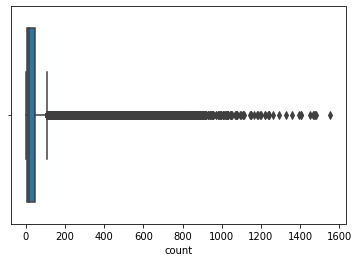

In [169]:
sns.boxplot(uid_count_df["count"])

<AxesSubplot:>

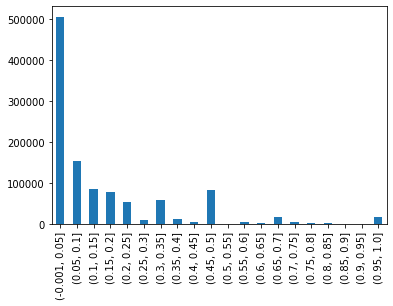

In [332]:
df = pd.merge(uid_count_df,user_click_count,on='uid')
pd.cut((df["sum(label)"]/df['count']).sort_values(ascending=False),bins=20).value_counts().sort_index().plot.bar()

CTR of each user in different category

<AxesSubplot:>

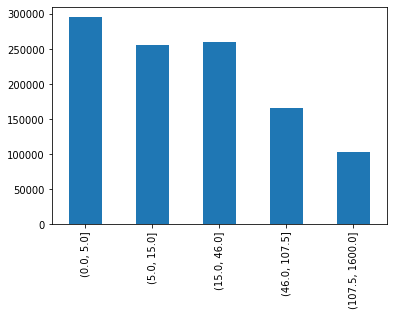

In [174]:
pd.cut(uid_count_df["count"],[0,5,15,46,41*1.5 + 46,1600]).value_counts().sort_index().plot.bar()

From the first glance, the conclusing might be that people being showed 15-46 times have hight Click count. But this didn't consider no very much user could have chance to be showed an ad 46 times. So we need to calculated CTR not just count

see the relation of frequency being displayed an ad between Click

In [215]:
user_click_count = raw_df.select("uid","label").groupby("uid").agg({'label':'sum'}).toPandas()

In [251]:
uid_count_df["bucket"] = pd.cut(uid_count_df["count"],[0,5,15,46,41*1.5 + 46,1600])

In [252]:
event_shown = uid_count_df.groupby("bucket")['count'].sum()
event_shown

bucket
(0.0, 5.0]           901928
(5.0, 15.0]         2466998
(15.0, 46.0]        7313342
(46.0, 107.5]      11817398
(107.5, 1600.0]    19407467
Name: count, dtype: int64

In [253]:
shown_click = pd.merge(uid_count_df,user_click_count,on='uid').groupby('bucket')['sum(label)'].sum()

CTR of each bucket

<AxesSubplot:xlabel='bucket'>

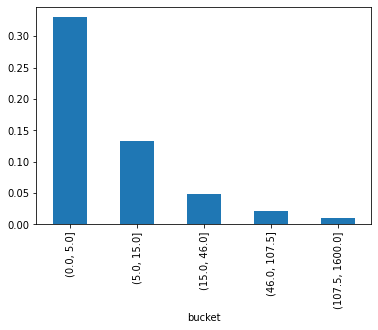

In [254]:
(shown_click/event_shown).plot.bar()

## age

since each row is ad event based. examing ages uf unique users will make more sense

In [260]:
raw_df = raw_df.withColumn("label_int", raw_df["label"].cast("integer"))

In [263]:
age_df = raw_df.select("uid","age","label_int").groupBy("uid","age").sum("label_int").toPandas()

In [271]:
users_diff_age_count = age_df.groupby("uid")['age'].count().sort_values(ascending=False)

In [275]:
users_diff_age_count.value_counts()

1    827370
2    233141
3     20755
4       169
5         1
Name: age, dtype: int64

This is something interesting, seems like a user even has fiv different age type. To deal with this 
1. replace -1 value if a user has other age registered.
2. I will create another age type "multiple age" covers users who has more than 2 different ages.

for users who has two ages, it accounts about 1/5 users.
I guess the reason is that 
1. these users didn't give their birthday when they register until being asked later.
2. some users grew older during these 7 days.
either way for users who has only 2 


there is two options:
1. always pick larger or smaller group
2. create another age group "two ages"

In [290]:
age_df["age"].value_counts().sort_index()

-1     22682
1     103372
2      46550
3      59172
4     250544
5     304674
6     306204
7     263400
Name: age, dtype: int64

Here I just choose the max value but I am interested in replace -1 with the min vale of others

In [291]:
age_df.groupby("uid")['age'].max().value_counts().sort_index()

-1      9895
1      12644
2      31696
3      48771
4     202976
5     252298
6     259756
7     263400
Name: age, dtype: int64

<AxesSubplot:>

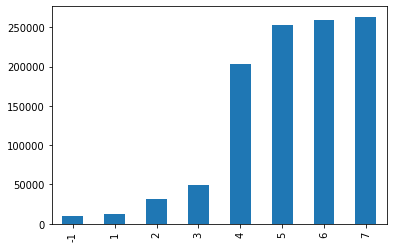

In [294]:
age_df.groupby("uid")['age'].max().value_counts().sort_index().plot.bar()

I think this makes sense if the higher the value, the older the user group.

In [286]:
agg_df = age_df.groupby("uid").agg({"age":max,"sum(label_int)":sum})

In [306]:
age_click = agg_df[["age",	"sum(label_int)"]].groupby("age")["sum(label_int)"].sum()
age_click

age
-1     30999
1     160670
2      58383
3      58372
4     257797
5     307217
6     299821
7     272229
Name: sum(label_int), dtype: int64

<AxesSubplot:xlabel='age'>

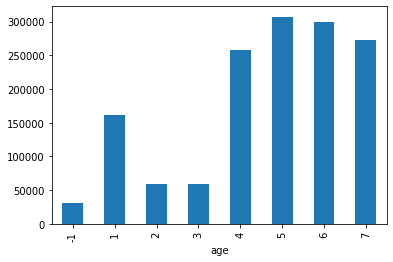

In [307]:
age_click.plot.bar()

This check how each age group clicked the ads. It is interesting that 2 and 3 has lower counts while 1 higher than them.
Let's see the CTR of each group

In [302]:
event_shown_age = pd.merge(agg_df,uid_count_df,on="uid").groupby("age")['count'].sum()
event_shown_age

age
-1      357018
1      4586160
2      1530861
3      1830995
4      9061943
5     11618291
6      8816722
7      4105143
Name: count, dtype: int64

CTR of each age group

<AxesSubplot:xlabel='age'>

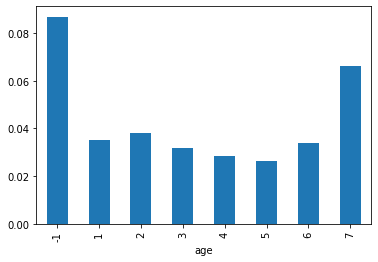

In [309]:
(age_click/event_shown_age).plot.bar()

## City

In [310]:
raw_df.select("city","city_rank").show()

+----+---------+
|city|city_rank|
+----+---------+
| 437|        5|
| 370|        5|
| 306|        3|
| 275|        5|
| 412|        3|
| 266|        4|
| 311|        3|
| 166|        3|
| 275|        5|
| 369|        4|
| 407|        3|
| 287|        2|
| 193|        5|
| 249|        3|
| 437|        5|
| 370|        5|
| 157|        3|
| 231|        5|
| 437|        5|
| 207|        5|
+----+---------+
only showing top 20 rows



In [311]:
raw_df.select(F.countDistinct("city")).show()

+--------------------+
|count(DISTINCT city)|
+--------------------+
|                 344|
+--------------------+



In [ ]:
def calculate_CTR(click,total_shown):
    return click/total_shown

## city_rank

In [312]:
raw_df.select(F.countDistinct("city_rank")).show()

+-------------------------+
|count(DISTINCT city_rank)|
+-------------------------+
|                        4|
+-------------------------+



In [313]:
raw_df.select("city_rank").groupBy("city_rank").count().show()

+---------+--------+
|city_rank|   count|
+---------+--------+
|        3|19311993|
|        5|14488752|
|        4| 7729572|
|        2|  376816|
+---------+--------+



In [350]:
df = raw_df.select("city_rank").groupBy("city_rank").count().toPandas()

In [342]:
df_click = raw_df.select("city_rank","label_int").groupBy("city_rank").sum("label_int").toPandas()

In [346]:
df_click = df_click.sort_values("city_rank").set_index("city_rank")
df_click

,sum(label_int)
city_rank,
2,29016
3,723725
4,256997
5,435750


<AxesSubplot:xlabel='city_rank'>

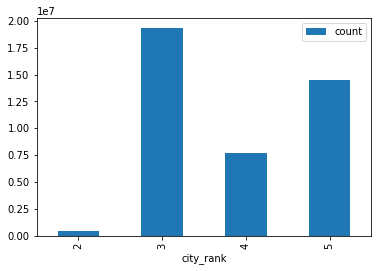

In [351]:
# how many times ads shown in different city_rank 
df = df.sort_values("city_rank").set_index("city_rank")
df.plot.bar()

In [352]:
df

,count
city_rank,
2,376816
3,19311993
4,7729572
5,14488752


<AxesSubplot:xlabel='city_rank'>

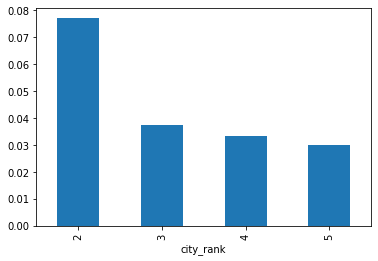

In [365]:
(df_click["sum(label_int)"]/df['count']).plot.bar()

seems like city_rank 2 has a higher CTR

## Career

In [366]:
raw_df.select(F.countDistinct('career')).show()

+----------------------+
|count(DISTINCT career)|
+----------------------+
|                     9|
+----------------------+



In [369]:
career_count = raw_df.select('career').groupBy('career').count().toPandas()
career_count

,career,count
0,7,1006608
1,3,1311863
2,8,723044
3,5,1866768
4,6,1109532
5,9,17084382
6,10,81285
7,4,17762020
8,2,961631


In [373]:
career_click = raw_df.select('career',"label_int").groupBy('career').sum("label_int").toPandas()
career_click

,career,sum(label_int)
0,7,26589
1,3,33877
2,8,19871
3,5,66470
4,6,39935
5,9,722271
6,10,2888
7,4,507487
8,2,26100


In [378]:
df = pd.merge(career_click,career_count,on="career").set_index("career").sort_index()
df

,sum(label_int),count
career,,
10,2888,81285
2,26100,961631
3,33877,1311863
4,507487,17762020
5,66470,1866768
6,39935,1109532
7,26589,1006608
8,19871,723044
9,722271,17084382


<AxesSubplot:xlabel='career'>

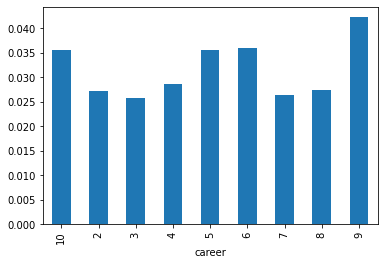

In [380]:
(df["sum(label_int)"]/df["count"]).plot.bar()

seems like career 10, 5,6,and 9 have higher CTR
but how's the actual career distribution among users? if it's possible that these 4 careers are minor careers among users so they can have a higer CTR?

In [384]:
df = raw_df['uid','career'].groupBy('career').agg(F.countDistinct("uid")).toPandas()
df

,career,count(uid)
0,7,21739
1,3,27319
2,8,16098
3,5,54226
4,6,32639
5,9,506005
6,10,2354
7,4,411355
8,2,26024


In [388]:
df.iloc[:,1].sum()

1097759

<AxesSubplot:xlabel='career'>

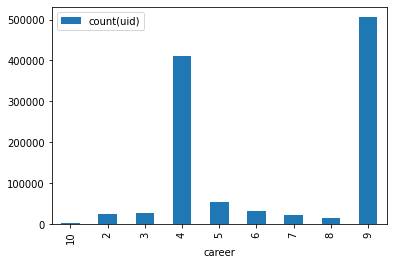

In [385]:
df.set_index("career").sort_index().plot.bar()

This chart confirm the reason career 10 has higher CTR because less career 10.
career 9 has the highest count but also highest CTR

## gender

In [391]:
dist = raw_df['uid','gender'].groupBy('gender').agg(F.countDistinct("uid")).toPandas()
dist

,gender,count(uid)
0,3,37873
1,4,250220
2,2,807676


<AxesSubplot:xlabel='gender'>

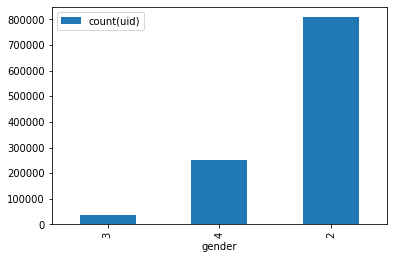

In [395]:
dist.set_index("gender").plot.bar()

In [383]:
count = raw_df.select('gender').groupBy('gender').count().toPandas()
count

,gender,count
0,3,514455
1,4,9225317
2,2,32167361


In [390]:
click = raw_df.select('gender',"label_int").groupBy('gender').sum("label_int").toPandas()
click

,gender,sum(label_int)
0,3,43712
1,4,314823
2,2,1086953


In [396]:
click.set_index("gender")["sum(label_int)"]/count.set_index("gender")["count"]

gender
3    0.084968
4    0.034126
2    0.033791
dtype: float64

<AxesSubplot:xlabel='gender'>

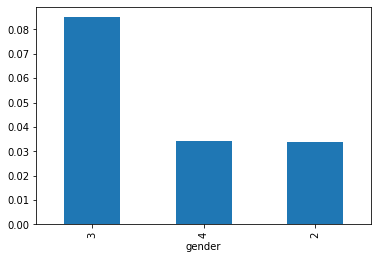

In [397]:
(click.set_index("gender")["sum(label_int)"]/count.set_index("gender")["count"]).plot.bar()

gender CTR

## residence

In [399]:
dist = raw_df['uid','residence'].groupBy('residence').agg(F.countDistinct("uid")).toPandas()
dist

,residence,count(uid)
0,15,31415
1,11,22568
2,29,35797
3,42,48381
4,30,17964
5,34,94373
6,28,38415
7,22,7
8,35,40839
9,16,2565


<AxesSubplot:xlabel='residence'>

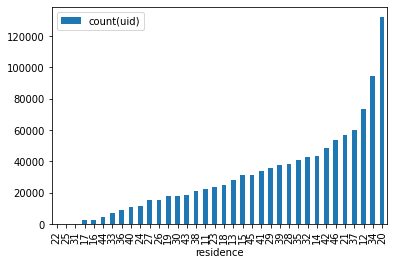

In [400]:
dist.set_index("residence").sort_values("count(uid)").plot.bar()

In [401]:
count = raw_df.select('residence').groupBy('residence').count().toPandas().set_index("residence")
click = raw_df.select('residence',"label_int").groupBy('residence').sum("label_int").toPandas().set_index("residence")

<AxesSubplot:xlabel='residence'>

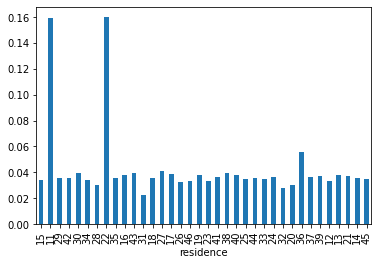

In [407]:
(click["sum(label_int)"]/count["count"]).plot.bar()

wow, 11 and 22 has two most highest CTR we I've seen sot far in EDA

but again, 22 has higer CTR because it shows up less in the whole dataset.
11 seems ligit though

## up_life_duration

In [408]:
dist = raw_df['uid','up_life_duration'].groupBy('up_life_duration').agg(F.countDistinct("uid")).toPandas()
dist

,up_life_duration,count(uid)
0,7,6813
1,-1,355286
2,15,5850
3,11,14918
4,3,6413
5,8,6661
6,16,44312
7,5,6501
8,18,259514
9,17,4043


<AxesSubplot:xlabel='up_life_duration'>

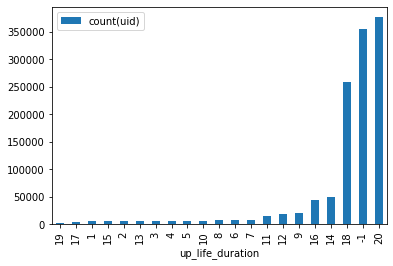

In [414]:
dist.set_index("up_life_duration").sort_values("count(uid)").plot.bar()

In [518]:
col = "up_life_duration"
count = raw_df.select(col).groupBy(col).count().toPandas().set_index(col)
click = raw_df.select(col,"label_int").groupBy(col).sum("label_int").toPandas().set_index(col)

<AxesSubplot:xlabel='up_life_duration'>

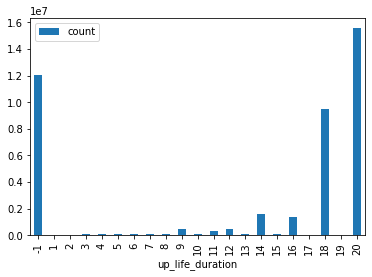

In [523]:
count.index = count.index.astype(int)
count.sort_index().plot.bar()

following cell check if ads distributed across up_life_duration evenly

<AxesSubplot:xlabel='up_life_duration'>

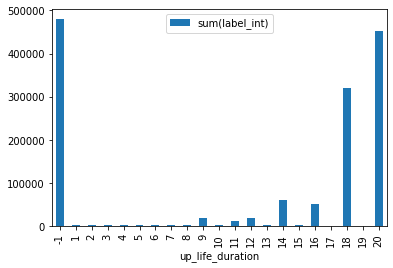

In [522]:
click.index = click.index.astype(int)
click.sort_index().plot.bar()

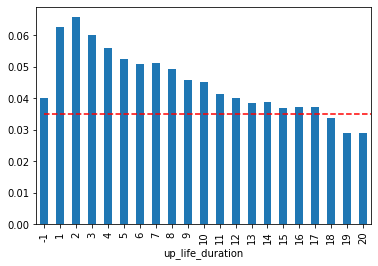

In [524]:
(click.iloc[:,0]/count.iloc[:,0]).sort_index().plot.bar()
plt.hlines(0.035, 0, 24,linestyles='dashed',colors="r")

I suspect the reason 1- 17 can have higer CTR is because they havea smaller denominator.
What interesting is that even 19 has a smaller total count, it still has ower CTR

## up_membership_grade

<AxesSubplot:xlabel='up_membership_grade'>

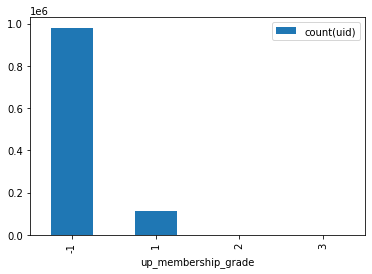

In [449]:
col = "up_membership_grade"
dist = raw_df['uid',col].groupBy(col).agg(F.countDistinct("uid")).toPandas()
dist.set_index(col).sort_index().plot.bar()

In [451]:
dist

,up_membership_grade,count(uid)
0,-1,979858
1,3,318
2,1,115303
3,2,957


CTR


<AxesSubplot:xlabel='up_membership_grade'>

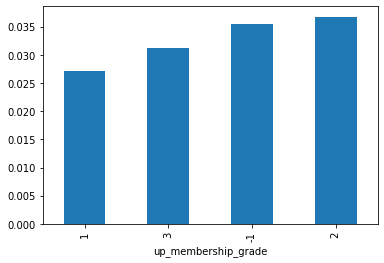

In [450]:
count = raw_df.select(col).groupBy(col).count().toPandas().set_index(col)
click = raw_df.select(col,"label_int").groupBy(col).sum("label_int").toPandas().set_index(col)
print("CTR")
(click.iloc[:,0]/count.iloc[:,0]).sort_values().plot.bar()

seems like most of them are -1, and the highest CTR here doesn't surpass total CTR which is 3.5%
this column seems not very useful to me

## communication_onlinerate

In [458]:
raw_df.select("communication_onlinerate").show()

+------------------------+
|communication_onlinerate|
+------------------------+
|    0^1^2^3^4^5^6^7^8...|
|    3^4^5^6^7^8^9^10^...|
|    0^1^2^3^4^5^6^7^8...|
|    5^6^7^8^9^10^11^1...|
|    2^3^4^5^6^7^8^9^1...|
|    6^7^8^9^10^11^12^...|
|    0^1^2^3^4^5^6^7^8...|
|    14^15^16^17^18^19...|
|    1^2^3^4^5^6^7^8^9...|
|    6^7^8^9^10^11^12^...|
|    6^7^8^9^10^11^12^...|
|                21^22^23|
|    2^3^4^5^6^7^8^9^1...|
|    6^7^8^9^10^11^12^...|
|    4^5^6^7^8^9^10^11...|
|    7^8^9^10^11^12^13...|
|    6^7^8^9^10^11^12^...|
|    6^7^8^9^10^11^12^...|
|    4^5^6^7^8^9^10^11...|
|    6^7^8^9^10^11^12^...|
+------------------------+
only showing top 20 rows



In [473]:
raw_df.select(F.split(raw_df.communication_onlinerate,"^")).show()

+--------------------------------------+
|split(communication_onlinerate, ^, -1)|
+--------------------------------------+
|                  [0^1^2^3^4^5^6^7^...|
|                  [3^4^5^6^7^8^9^10...|
|                  [0^1^2^3^4^5^6^7^...|
|                  [5^6^7^8^9^10^11^...|
|                  [2^3^4^5^6^7^8^9^...|
|                  [6^7^8^9^10^11^12...|
|                  [0^1^2^3^4^5^6^7^...|
|                  [14^15^16^17^18^1...|
|                  [1^2^3^4^5^6^7^8^...|
|                  [6^7^8^9^10^11^12...|
|                  [6^7^8^9^10^11^12...|
|                            [21^22^23]|
|                  [2^3^4^5^6^7^8^9^...|
|                  [6^7^8^9^10^11^12...|
|                  [4^5^6^7^8^9^10^1...|
|                  [7^8^9^10^11^12^1...|
|                  [6^7^8^9^10^11^12...|
|                  [6^7^8^9^10^11^12...|
|                  [4^5^6^7^8^9^10^1...|
|                  [6^7^8^9^10^11^12...|
+--------------------------------------+
only showing top

So weird that it didn't split on "^", I have to try another way

In [496]:
raw_df = raw_df.withColumn("start_communication_onlinerate",raw_df.communication_onlinerate.substr(1,2))
raw_df = raw_df.withColumn("start_communication_onlinerate",F.regexp_extract(raw_df.start_communication_onlinerate,r'(\d+)',1))

In [497]:
raw_df = raw_df.withColumn("last_communication_onlinerate",raw_df.communication_onlinerate.substr(-2,2))
raw_df = raw_df.withColumn("last_communication_onlinerate",F.regexp_extract(raw_df.last_communication_onlinerate,r'(\d+)',1))

In [498]:
raw_df.select("start_communication_onlinerate","last_communication_onlinerate").show()

+------------------------------+-----------------------------+
|start_communication_onlinerate|last_communication_onlinerate|
+------------------------------+-----------------------------+
|                             0|                           23|
|                             3|                           23|
|                             0|                           23|
|                             5|                           23|
|                             2|                           23|
|                             6|                           23|
|                             0|                           23|
|                            14|                           23|
|                             1|                           23|
|                             6|                           23|
|                             6|                           23|
|                            21|                           23|
|                             2|                       

In [504]:
raw_df.select(raw_df.last_communication_onlinerate == 0).show()

+-----+-------+-------+------+-------------+-----------+------+-------------+-------+-------------+----+---------------+----------------+---+----+---------+-----------+-----------+------+------+--------+---------+------------+-----------------+---------+--------+---------+------------+----------------+-------------------+------------------------+----------------+------------------------+---------------------------+---------+----+---------+------------------------------+-----------------------------+---------------------------------+
|label|    uid|task_id|adv_id|creat_type_cd|adv_prim_id|dev_id|inter_type_cd|slot_id|spread_app_id|tags|app_first_class|app_second_class|age|city|city_rank|device_name|device_size|career|gender|net_type|residence|his_app_size|his_on_shelf_time|app_score|emui_dev|list_time|device_price|up_life_duration|up_membership_grade|membership_life_duration|consume_purchase|communication_onlinerate|communication_avgonline_30d|indu_name|pt_d|label_int|start_communicatio

There are entries ends with 0, replace it with 24

In [505]:
raw_df = raw_df.withColumn("last_communication_onlinerate"\
                           ,raw_df.last_communication_onlinerate + 24 - raw_df.last_communication_onlinerate)

In [506]:
raw_df = raw_df.withColumn("duration_communication_onlinerate"\
                  ,raw_df.last_communication_onlinerate-raw_df.start_communication_onlinerate)

<AxesSubplot:xlabel='duration_communication_onlinerate'>

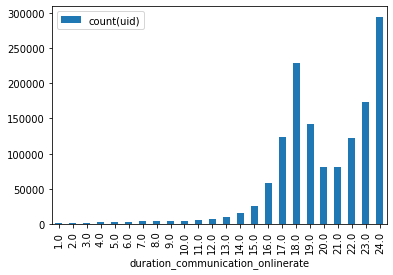

In [507]:
col = "duration_communication_onlinerate"
dist = raw_df['uid',col].groupBy(col).agg(F.countDistinct("uid")).toPandas()
dist.set_index(col).sort_index().plot.bar()

interesting that a lot users active either 18 or 24 hours a day.
I suppose users active 18 hours means that those users are using plone all the time while awake.
I guess users active 24 hours means there is some app still open so the plone didn't go off. or they do keep awake 24 hours and using it 24 hrs.

In [515]:
count = raw_df.select(col).groupBy(col).count().toPandas().set_index(col)
click = raw_df.select(col,"label_int").groupBy(col).sum("label_int").toPandas().set_index(col)

CTR


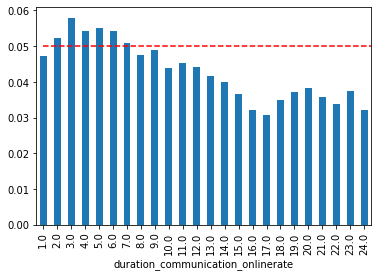

In [516]:
print("CTR")
(click.iloc[:,0]/count.iloc[:,0]).sort_index().plot.bar()
plt.hlines(0.05, 0, 24,linestyles='dashed',colors="r")

seems like being active 2 to 6 hours means true "active" users. especially 3 hrs.
furthermore, among this range, being active 3 hrs-ish makes people want to click the ads.
My assumption is that 
1. 3 hrs is the limit people can resist himself from clicking ads that keeps showing again and again  
2. or users was tired using same app 3 hrs, his dropped his guard and then finally click the ads
3. or there is an ad super interesing that most users will click, however 3 hrs is a cycle that all ads can be dispyayed to users. so using app 3hrs gurantee at least once that fun ad was displayed to users. I will combine this assumption with later ads discovery to confirm my theory

## communication_avgonline_30d

<AxesSubplot:xlabel='communication_avgonline_30d'>

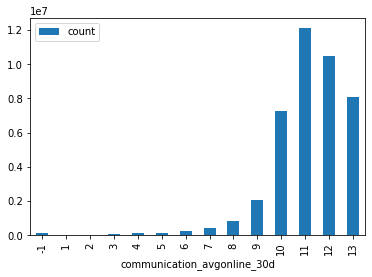

In [541]:
col = "communication_avgonline_30d"
dist = raw_df.select(col).groupBy(col).count().toPandas()
dist = dist.set_index(col)
dist.index = dist.index.astype(int)
dist.sort_index().plot.bar()

<AxesSubplot:xlabel='communication_avgonline_30d'>

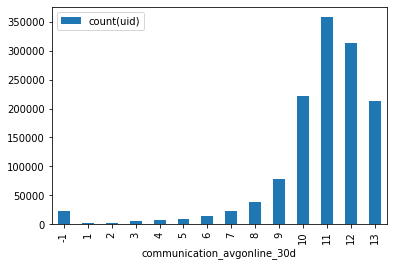

In [540]:
dist = raw_df['uid',col].groupBy(col).agg(F.countDistinct("uid")).toPandas()
dist = dist.set_index(col)
dist.index = dist.index.astype(int)
dist.sort_index().plot.bar()

In [535]:
count = raw_df.select(col).groupBy(col).count().toPandas().set_index(col)
click = raw_df.select(col,"label_int").groupBy(col).sum("label_int").toPandas().set_index(col)

CTR


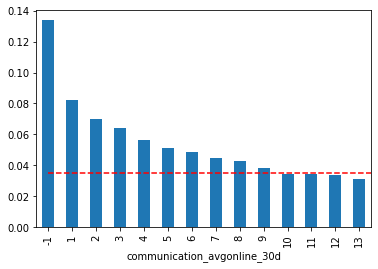

In [537]:
print("CTR")
df = click.iloc[:,0]/count.iloc[:,0]
df.index = df.index.astype(int)
df.sort_index().plot.bar()
plt.hlines(0.035, 0, 24,linestyles='dashed',colors="r")

## consume_purchase

<AxesSubplot:xlabel='consume_purchase'>

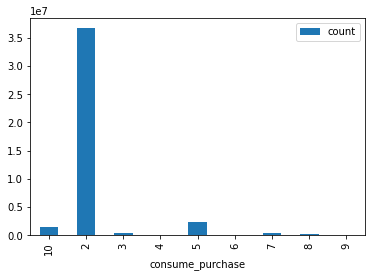

In [531]:
col = "consume_purchase"
raw_df.select(col).groupBy(col).count().toPandas().set_index(col).sort_index().plot.bar()

<AxesSubplot:xlabel='consume_purchase'>

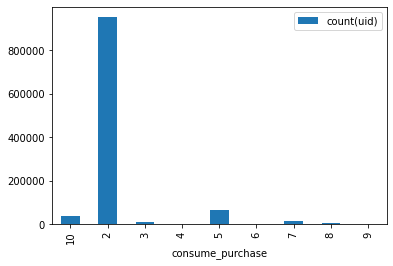

In [526]:
dist = raw_df['uid',col].groupBy(col).agg(F.countDistinct("uid")).toPandas()
dist.set_index(col).sort_index().plot.bar()

In [527]:
count = raw_df.select(col).groupBy(col).count().toPandas().set_index(col)
click = raw_df.select(col,"label_int").groupBy(col).sum("label_int").toPandas().set_index(col)

CTR


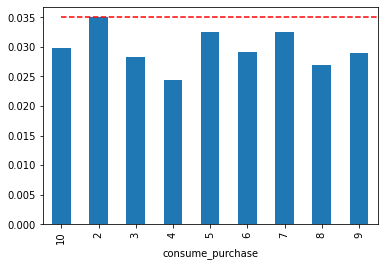

In [530]:
print("CTR")
(click.iloc[:,0]/count.iloc[:,0]).sort_index().plot.bar()
plt.hlines(0.035, 0, 24,linestyles='dashed',colors="r")

ouch seems like this feature doesn't help at all

In [ ]:
## 